## Traffic Data

In [40]:
data_path = "/home/qiyu/data/"
data_set = "traffic"
file_name = data_path+data_set+".npy"
import numpy as np
dat = np.load(file_name)
print(dat.shape)
print(type(dat))

(35136, 115)
<class 'numpy.ndarray'>


/home/qiyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


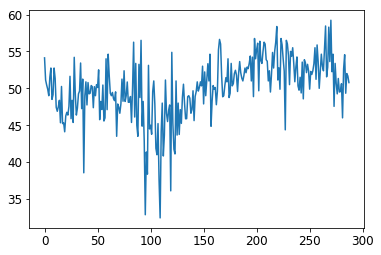

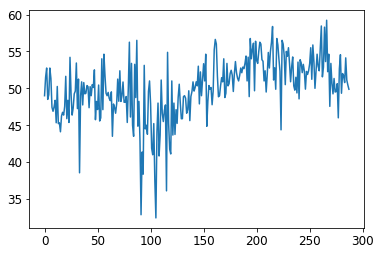

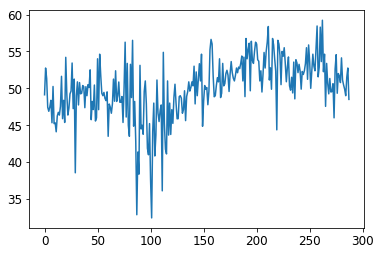

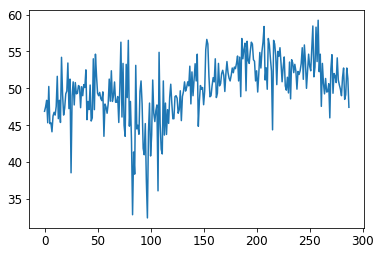

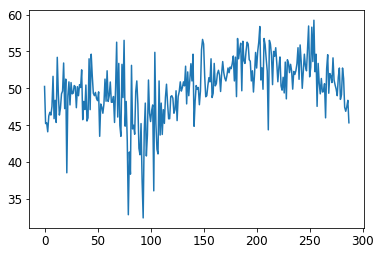

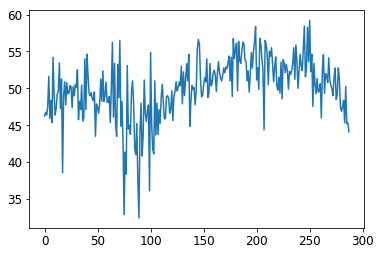

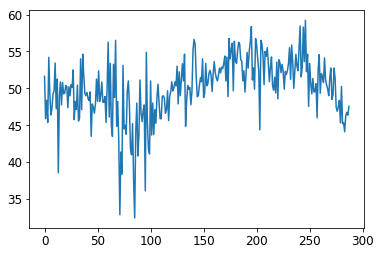

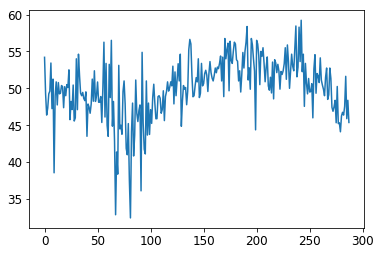

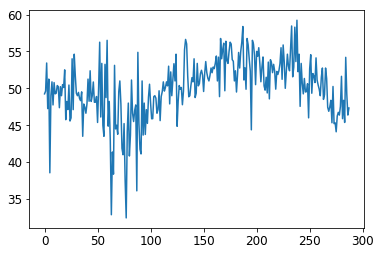

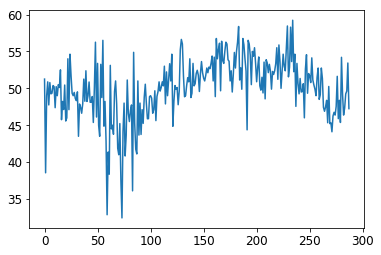

In [73]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

params = {
   'axes.labelsize': 12,
   'text.fontsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False
   }
mpl.rcParams.update(params)


for i in range(200,210):
    plt.figure()
    plt.plot(dat_aug[i,:,0])

### Fill missing (zero) value 

Use the mean of same time, other days to fill in

In [67]:
import numpy as np
def fill_zero_daily(x):
    nz_idx = np.nonzero(x)
  
    zero_idx = np.argwhere(x==0)
    if len(nz_idx[0])==0:
         print('all zero')
    else:
        mean_val = np.mean(x[nz_idx])
        x[zero_idx] = mean_val
    return x

def fill_zero(dat):
    n_dim = dat.shape[1]
    dat_reshape = dat.reshape((-1,12*24,n_dim)) # daily traffic

    mat_nz = np.copy(dat_reshape)
    for i in range(mat.shape[1]):
        for j in range(mat.shape[2]):
            mat_nz[:,i,j] = fill_zero_daily(mat_nz[:,i,j])
    return mat_nz

### Subsample the data  20 min for every day

In [75]:
dat_nz = fill_zero(dat)
n_days = dat_nz.shape[0]
dat_aug = []

def up_sample(x):
    """upsample each day into 72 examples"""
    x_aug = []
    for j in range(24*3):
        x_aug.append(np.roll(x,-j*4, axis=0))
    return np.array(x_aug)
    
for i in range(n_days):
    dat_up = up_sample(dat_nz[i,:,:])
    dat_aug.append(dat_up)
dat_aug = np.concatenate(dat_aug, axis=0)
print(dat_aug.shape)
dat_aug_sub = dat_aug[:,:,:15]
print(dat_aug_sub.shape)
np.save('/home/qiyu/data/traffic_s2s.npy',dat_aug_sub)

(8784, 288, 115)
(8784, 288, 15)


### rescale and save

In [ ]:
dat = rescale_ts(dat)

import numpy as np
np.save(data_path+data_set, dat)

In [23]:
import pandas as pd
df = pd.DataFrame(dat)
df.describe()

,0,1,2,3,4,5,6,7,8
count,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000
mean,50.508417,50.503683,58.170064,46.553948,55.185665,57.673351,61.445361,60.170434,53.350660
std,22.002591,21.186229,17.198190,23.509789,15.795010,17.010578,18.623338,20.562127,21.738019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,35.375000,61.333333,32.555556,55.625000,61.250000,66.000000,65.333333,44.870536
50%,59.375000,61.875000,64.444444,57.375000,59.750000,63.444444,67.500000,67.555556,65.375000
75%,64.000000,64.750000,66.500000,62.857143,62.875000,64.777778,68.428571,68.714286,68.111111
max,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000


### visualize traffic series

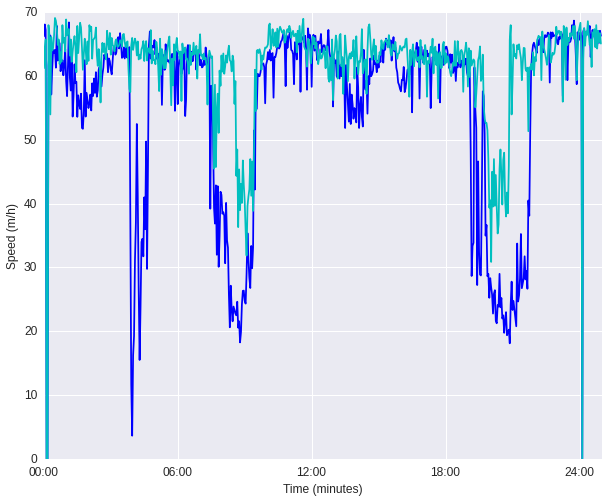

In [62]:
import matplotlib.ticker as ticker

params = {
   'axes.labelsize': 20,
   'text.fontsize': 20,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

data_mat = dat
T = 600
ax.plot(data_mat[:T,1], 'b')
# ax.plot(data_mat[:T,1], 'c')
ax.plot(data_mat[:T,2], 'c')
ax.set_xlabel("Time (minutes)")
ax.set_ylabel("Speed (m/h)")


x = len(data_mat)
tick_spacing = 144
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks([0,144, 288, 432, 576 ], ['00:00','06:00','12:00','18:00', '24:00'])

fig.savefig('traffic.png')

## Climate (TMAX) data

In [33]:
data_path = "/home/qiyu/data/"
data_set = "climate"
file_name = data_path+data_set+".npy"
import numpy as np
dat = np.load(file_name)
print(dat.shape)
print(type(dat))

(45384, 54)
<class 'numpy.ndarray'>


In [34]:
# remove the anomalous high values
dat[dat>200]=-1

In [37]:
import numpy as np
def fill_missing_daily(x):
    nz_idx = np.nonzero(x+1)
  
    missing_idx = np.argwhere(x==-1)
    if len(nz_idx[0])==0:
         print('all missing')
    else:
        mean_val = np.mean(x[nz_idx])
        x[missing_idx] = mean_val
    return x

def fill_missing(dat):
    n_dim = dat.shape[1]
    dat_reshape = dat.reshape((-1,24,n_dim)) # daily traffic

    mat_nz = np.copy(dat_reshape)
    for i in range(mat_nz.shape[1]):
        for j in range(mat_nz.shape[2]):
            mat_nz[:,i,j] = fill_missing_daily(mat_nz[:,i,j])
    return mat_nz
dat_nz = fill_missing(dat)
print(dat_nz.shape)

(1891, 24, 54)


/home/qiyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


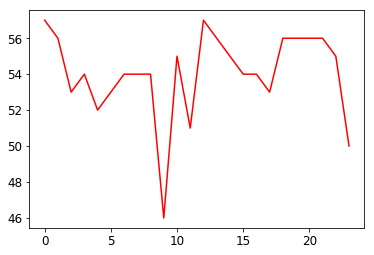

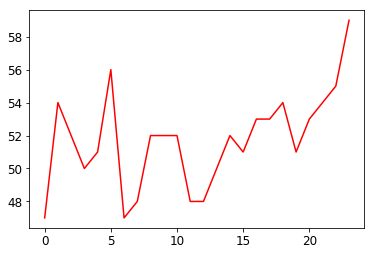

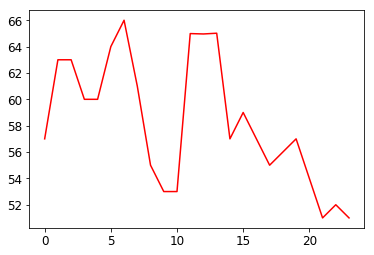

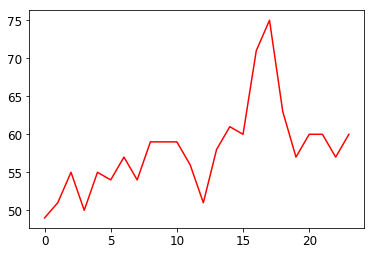

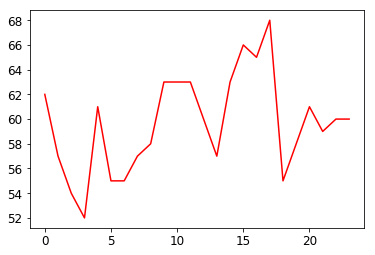

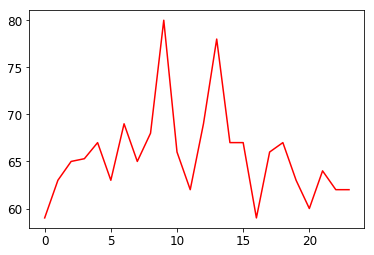

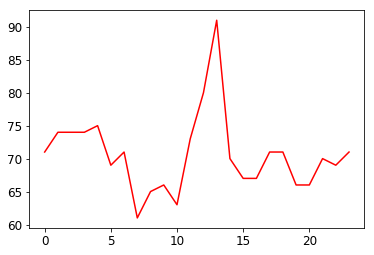

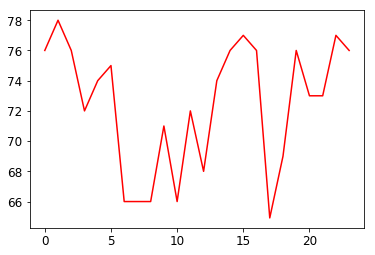

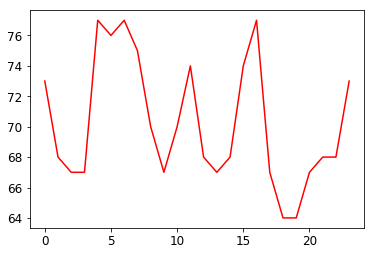

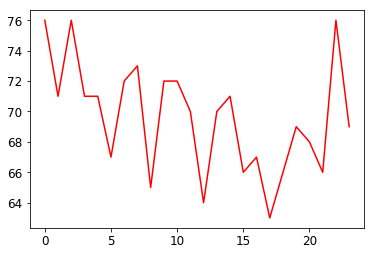

In [32]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

params = {
   'axes.labelsize': 12,
   'text.fontsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False
   }
mpl.rcParams.update(params)

dat_reshape = dat.reshape((-1,24,54)) # daily traffic

for i in range(0,10):
    plt.figure()
    plt.plot(mat_nz[i,:,0], 'r-')

In [38]:
n_days = dat_nz.shape[0]
dat_aug = []

def up_sample(x):
    """upsample each day into 6 examples (every 4 hour)"""
    x_aug = []
    for j in range(6):
        x_aug.append(np.roll(x,-j*4, axis=0))
    return np.array(x_aug)
    
for i in range(n_days):
    dat_up = up_sample(dat_nz[i,:,:])
    dat_aug.append(dat_up)
dat_aug = np.concatenate(dat_aug, axis=0)
print(dat_aug.shape)
# dat_aug_sub = dat_aug[:,:,:15]
# print(dat_aug_sub.shape)
np.save('/home/qiyu/data/climate_s2s.npy',dat_aug)

(11346, 24, 54)
